In [2]:
### Libraries for loading in data and building features
import numpy as np
import pandas as pd
from src.modules import * #contains functions used in common with processing election and IRS data
import os

In [3]:

### Libraries for random forest modeling
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA # There are a LOT of features, so using PCA to reduce them seems like a good idea
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score #using MSE at first, remember to try other error metrics with future analysis

### Libraries for visualizing the final results
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# Load data, this file is the np.log of the files created in 'merge_State_IRS_data.py', see 'transform_with_log' file for details
house_IRS_diff = pd.read_csv('data/logarithm_of_joined_data/house_IRS_d_log.csv')

### Create columns for incumbant voteshare and challenger voteshare

# Combines votes for incumbant candidates regardless of party
house_IRS_diff['Inc'] = (house_IRS_diff['R1'] + house_IRS_diff['D1']) 
# if future data contains incumbants who are not Dem or Rep, INCLUDE THOSE

# Combines votes for challengers regardless of party
house_IRS_diff['Challenger'] = (house_IRS_diff['R0'] + house_IRS_diff['D0'] + house_IRS_diff['OTHER0']) 

In [5]:
# Assign X and y
X = house_IRS_diff.drop(['D0', 'D1', 'OTHER0', 'R0', 'R1','Inc','Challenger'],axis=1)
### Our dependent variables for this model will just be 'Inc' and 'Challenger'
y = house_IRS_diff[['Inc','Challenger']]

In [7]:
# Resetting all values:
# prepare scaler
scaler_MM = MinMaxScaler()
X_scaled = scaler_MM.fit_transform(X)

# PCA to reduce the number of features
pca = PCA(n_components=15)
X_pca = pca.fit_transform(X_scaled)

# Split into train and test sets  
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=12)

In [ ]:
### from the gridsearch:
# Best hyperparameters for RandomForest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
# Best model for RandomForest: RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150)
# Mean Squared Error on Test Set: 26.312933714897472


In [8]:
# Configure the model:
best_model = RandomForestRegressor(max_depth = 10, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 150, random_state=12)

#Fit the model
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_leaf=2, n_estimators=150,
                      random_state=12)

r2 = 0.3195809951346389 
 and mse = 26.77600391263502


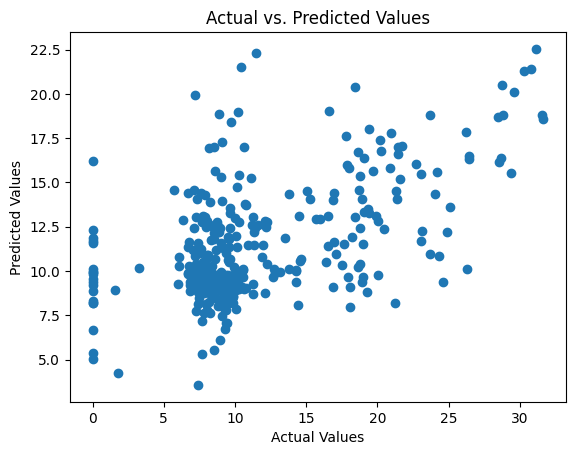

In [9]:
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f'r2 = {r2} \n and mse = {mse}')

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()